In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data
beer = pd.read_csv('beer_reviews/beer_reviews.csv')
beer.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [4]:
beer.size

20625982

In [3]:
beer.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


### Dealing with missing data

In [5]:
pmean = beer.beer_abv.mean()
pmedian = beer.beer_abv.median()
pmode = beer.beer_abv.mode()

In [7]:
#beer.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [8]:
# Fill NaN
beer.brewery_name.fillna('Unknown', inplace=True)
beer.review_profilename.fillna('Guest', inplace=True)
beer.beer_abv.fillna(beer.beer_abv.median(), inplace=True)

## 1. Which brewery produces the strongest beers by ABV%?

<b>The Goal</b>
<p>The goal is to find a brewery that produces a number of beers with extremely high ABV</p>
</br>
<b>The Plan</b>
<p></p>

In [6]:
def flatten_groupby_df(indf,col_names,parent_col):
    df = indf
    df = df.reset_index()
    index_name = df.columns[0][0]
    
    outdf = pd.DataFrame()
    outdf[index_name] = df[index_name]
    for col in col_names:
        outdf[col] = df[parent_col][col]

    return outdf

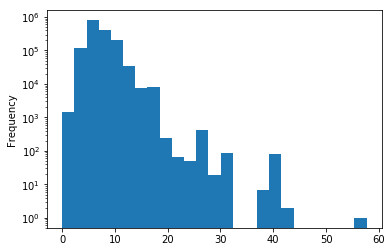

In [16]:
# Distribution of ABV content of the beer-reviews data
beer.beer_abv.plot(kind='hist', bins=25, log=True)

### Investigating Brewery's ABV Contents

In [7]:
abv_beer = beer[['brewery_name', 'beer_name', 'beer_abv']].groupby(
    ['brewery_name', 'beer_name']).count().reset_index()
abv_beer = abv_beer.rename(columns={'beer_abv':'count'})

abv_beerabv = beer[['brewery_name', 'beer_name', 'beer_abv']].groupby(
    ['brewery_name', 'beer_name']).mean().reset_index()

abv_beer = abv_beer.merge(abv_beerabv)
abv_beer.head()

,brewery_name,beer_name,count,beer_abv
0,'t Hofbrouwerijke,Blondelle,1,8.0
1,'t Hofbrouwerijke,Bosprotter,9,8.5
2,'t Hofbrouwerijke,Hof Korvatunturi,2,11.0
3,'t Hofbrouwerijke,Hofblues,16,5.5
4,'t Hofbrouwerijke,Hofdraak,7,6.5


In [8]:
abv_beer.size

262716

In [114]:
abv_beer = abv_beer[abv_beer['count']>2]

In [115]:
abv_beer['count'].describe()

count    31855.000000
mean        48.421661
std        156.017990
min          3.000000
25%          4.000000
50%          8.000000
75%         25.000000
max       3290.000000
Name: count, dtype: float64

In [116]:
abv_beer['beer_abv'].describe()

count    31855.000000
mean         6.500944
std          1.943382
min          0.010000
25%          5.100000
50%          6.500000
75%          7.000000
max         41.000000
Name: beer_abv, dtype: float64

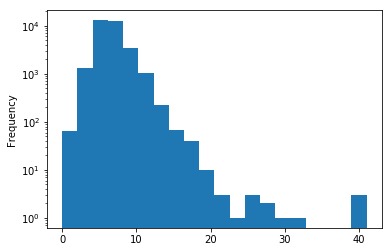

In [117]:
abv_beer['beer_abv'].plot(kind='hist', bins=20, log=True)

In [118]:
high_abv_beer = abv_beer[abv_beer['beer_abv']>17]
#high_abv_beer = high_abv_beer.reset_index()
high_abv_beer.sort_values(by='beer_abv', ascending=False, inplace=True)
high_abv_beer.head()

/home/zafrin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,brewery_name,beer_name,count,beer_abv
11078,BrewDog,Sink The Bismarck!,76,41.00
52293,Schorschbräu,Schorschbräu Schorschbock 40%,3,39.44
19157,De Struise Brouwers,Black Damnation VI - Messy,7,39.00
11084,BrewDog,Tactical Nuclear Penguin,88,32.00
28082,Hair of the Dog Brewing Company / Brewery and ...,Dave,16,29.00


In [103]:
high_abv_beer.brewery_name.value_counts().head()

Mikkeller ApS                         8
The Bruery                            6
BrewDog                               6
Boston Beer Company (Samuel Adams)    6
Schorschbräu                          4
Name: brewery_name, dtype: int64

In [119]:
high_abv_beer.brewery_name.value_counts().head()

Mikkeller ApS                         7
BrewDog                               6
Boston Beer Company (Samuel Adams)    6
The Bruery                            5
Dogfish Head Brewery                  4
Name: brewery_name, dtype: int64

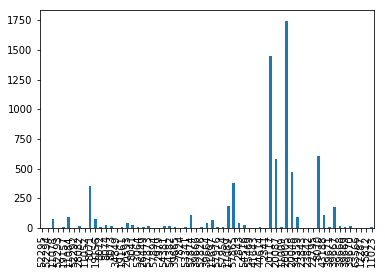

In [110]:
high_abv_beer['count'].plot(kind='bar')

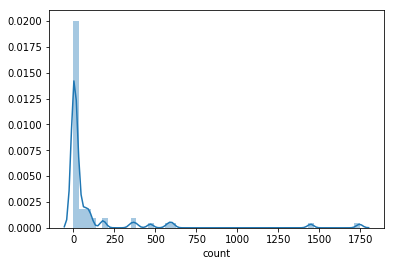

In [111]:
sns.distplot(high_abv_beer['count'])

In [120]:
#high_abv_beer['count'].value_counts()

In [102]:
high_abv_brew = high_abv_beer[['brewery_name', 'beer_abv']].groupby(['brewery_name']).describe()
high_abv_brew = flatten_groupby_df(high_abv_brew, cols, parent_col='beer_abv')
high_abv_brew.sort_values(['mean', '75%', '50%', 'max', 'min'], ascending=False, inplace=True)
high_abv_brew[high_abv_brew['count']>1]

,brewery_name,count,mean,std,min,25%,50%,75%,max
22,Schorschbräu,4.0,42.750000,11.193647,30.86,37.2950,41.220,46.6750,57.7
9,De Struise Brouwers,3.0,29.000000,8.888194,22.00,24.0000,26.000,32.5000,39.0
6,BrewDog,6.0,25.733333,9.662850,17.20,18.0500,23.100,31.0000,41.0
5,Boston Beer Company (Samuel Adams),6.0,23.250000,3.431472,17.50,21.7500,24.500,25.0000,27.0
26,Sonoran Brewing Company,2.0,19.435000,0.091924,19.37,19.4025,19.435,19.4675,19.5
29,The Bruery,6.0,18.716667,0.614546,18.20,18.3000,18.400,19.2500,19.5
10,Dogfish Head Brewery,4.0,18.000000,0.000000,18.00,18.0000,18.000,18.0000,18.0
13,Flying Monkeys Craft Brewery,2.0,18.000000,0.000000,18.00,18.0000,18.000,18.0000,18.0
18,Mikkeller ApS,8.0,17.962500,0.673875,17.50,17.5000,17.500,18.5000,19.2


In [121]:
high_abv_brew = high_abv_beer[['brewery_name', 'beer_abv']].groupby(['brewery_name']).describe()
high_abv_brew = flatten_groupby_df(high_abv_brew, cols, parent_col='beer_abv')
high_abv_brew.sort_values(['mean', '75%', '50%', 'max', 'min'], ascending=False, inplace=True)
high_abv_brew[high_abv_brew['count']>1]

,brewery_name,count,mean,std,min,25%,50%,75%,max
4,De Struise Brouwers,3.0,29.000000,8.888194,22.00,24.0000,26.000,32.5000,39.0
2,BrewDog,6.0,25.733333,9.662850,17.20,18.0500,23.100,31.0000,41.0
1,Boston Beer Company (Samuel Adams),6.0,23.250000,3.431472,17.50,21.7500,24.500,25.0000,27.0
18,Sonoran Brewing Company,2.0,19.435000,0.091924,19.37,19.4025,19.435,19.4675,19.5
20,The Bruery,5.0,18.560000,0.536656,18.20,18.3000,18.300,18.5000,19.5
5,Dogfish Head Brewery,4.0,18.000000,0.000000,18.00,18.0000,18.000,18.0000,18.0
11,Mikkeller ApS,7.0,17.885714,0.689030,17.50,17.5000,17.500,18.0000,19.2


In [122]:
# % of beer invluded in high_abv_beer
xx = abv_beer[abv_beer['beer_abv']>17.49]
len(xx)/len(abv_brew)

0.008009751001218875

In [123]:
# Another senario can include a higher % of high-abv-beer
xx = abv_beer[abv_beer['beer_abv']>13]
len(xx)/len(abv_brew)

0.03604387950548494

Another alternative way this could have been accompalished is by excluding couut < 1 or 2. At brew level it won't make any difference. But at beer level it may make a difference 

#### Assumptions

* Alcohol content is assumed to be accurate
* Beer Database is assumed to be valid
* No data point was excluded even if there were just one review.

#### Result and Conclusion

* top 1% and top 5% - what other way to take that

## If you had to pick 3 beers to recommend using only the data in this dataset, which would you pick?

In [37]:
for col in beer.columns:
    print(col, '\t\t', len(beer[col].unique()))

brewery_id 		 5840
brewery_name 		 5743
review_time 		 1577960
review_overall 		 10
review_aroma 		 9
review_appearance 		 10
review_profilename 		 33388
beer_style 		 104
review_palate 		 9
review_taste 		 9
beer_name 		 56857
beer_abv 		 530
beer_beerid 		 66055


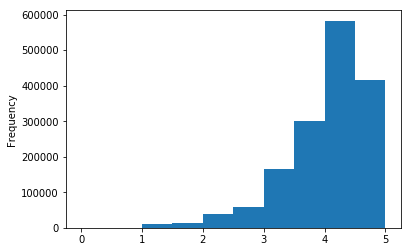

In [39]:
beer.review_overall.plot(kind='hist')

In [43]:
len(beer[beer.review_overall>=5])

91320

In [157]:
beer['review_time'] = pd.to_datetime(beer['review_time'], unit='s')
beer['review_time'].head()

0   2009-02-16 20:57:03
1   2009-03-01 13:44:57
2   2009-03-01 14:10:04
3   2009-02-15 19:12:25
4   2010-12-30 18:53:26
Name: review_time, dtype: datetime64[ns]

In [158]:
beer['review_time'].min()

Timestamp('1996-08-22 00:00:01')

In [159]:
beer['review_time'].max()

Timestamp('2012-01-11 12:35:48')

In [163]:
import datetime as dt
#beer['review_time'].dt.year

In [59]:
beer['review_time'].head()

0    1234817823
1    1235915097
2    1235916604
3    1234725145
4    1293735206
Name: review_time, dtype: int64

In [61]:
all5_beer = beer[(beer.review_overall==5.0) & (beer.review_aroma==5.0) & (beer.review_appearance==5.0) &
     (beer.review_palate ==5.0) & (beer.review_taste==5.0)]
all5_beer = all5_beer.groupby(['beer_name']).review_overall.count().sort_values(ascending=False).head(10)
all5_beer

beer_name
Pliny The Elder                            156
Trappist Westvleteren 12                   134
Founders KBS (Kentucky Breakfast Stout)    112
Pliny The Younger                           92
Trappistes Rochefort 10                     84
The Abyss                                   83
Bell's Hopslam Ale                          72
Founders Breakfast Stout                    72
Stone Imperial Russian Stout                68
St. Bernardus Abt 12                        56
Name: review_overall, dtype: int64

### (Un)available Beer

In [167]:
# Filter out beer no longer available in market
current_beer = beer[beer['review_time'].dt.year>=2011]
before = len(beer.groupby(['beer_name']).count())
after = len(current_beer.groupby(['beer_name']).count())
print(before, after)
print('Rows Deleted: ', before-after)

56857 27442
Rows Deleted:  29415


### Rate the Reviewer

In [128]:
len(beer.review_profilename.unique())

33388

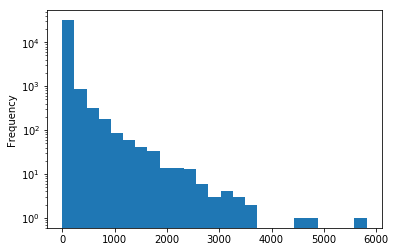

In [134]:
beer.review_profilename.value_counts().plot(kind='hist', bins=25, log=True)

In [136]:
reviewers = beer[['beer_name', 'review_profilename']].groupby(['review_profilename']).count().reset_index()
reviewers.head()

,review_profilename,beer_name
0,0110x011,139
1,01Ryan10,1
2,02maxima,4
3,03SVTCobra,3
4,04101Brewer,3


In [137]:
len(reviewers)

33388

In [141]:
r = reviewers[reviewers['beer_name']>4]
len(r)

14812

In [145]:
len(r.beer_name.unique())

996

In [146]:
r.beer_name.median()

21.0

In [148]:
r.beer_name.mode()

0    5
dtype: int64

In [147]:
r.beer_name.describe()

count    14812.000000
mean       104.933770
std        263.132522
min          5.000000
25%          9.000000
50%         21.000000
75%         78.000000
max       5817.000000
Name: beer_name, dtype: float64

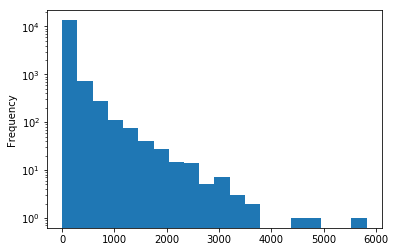

In [153]:
r.beer_name.plot(kind='hist', bins=20, log=True)

### 

In [132]:
name_id_difference = beer[['beer_beerid', 'beer_name']].groupby(['beer_name']).count()
len(name_id_difference)

56857

In [139]:
(name_id_difference.beer_beerid == 1).value_counts()

False    37949
True     18908
Name: beer_beerid, dtype: int64

In [128]:
beer.beer_name.isnull().sum()

0

In [31]:
len(beer['beer_name'].value_counts()>1)

56857

In [35]:
type(beer['beer_name'].value_counts()>1)

pandas.core.series.Series

In [36]:
beer['beer_name'].value_counts()>1

90 Minute IPA                                  True
India Pale Ale                                 True
Old Rasputin Russian Imperial Stout            True
Sierra Nevada Celebration Ale                  True
Two Hearted Ale                                True
Stone Ruination IPA                            True
Arrogant Bastard Ale                           True
Sierra Nevada Pale Ale                         True
Stone IPA (India Pale Ale)                     True
Pliny The Elder                                True
Founders Breakfast Stout                       True
Pale Ale                                       True
Sierra Nevada Bigfoot Barleywine Style Ale     True
La Fin Du Monde                                True
60 Minute IPA                                  True
Storm King Stout                               True
Duvel                                          True
Brooklyn Black Chocolate Stout                 True
Bell's Hopslam Ale                             True
Samuel Adams

In [ ]:
beer[['brewery_name', 'beer_abv']].groupby(['brewery_name']).mean()
abv.sort_values(['beer_abv'], ascending=False, inplace=True)
abv.head()

In [20]:
len(beer)

1586614

In [29]:
x = beer['beer_name'].value_counts()>1

In [49]:
(beer['beer_name'].value_counts()>1).reset_index()

,index,beer_name
0,90 Minute IPA,True
1,India Pale Ale,True
2,Old Rasputin Russian Imperial Stout,True
3,Sierra Nevada Celebration Ale,True
4,Two Hearted Ale,True
5,Stone Ruination IPA,True
6,Arrogant Bastard Ale,True
7,Sierra Nevada Pale Ale,True
8,Stone IPA (India Pale Ale),True
9,Pliny The Elder,True


In [30]:
x.describe()

count     56857
unique        2
top        True
freq      37949
Name: beer_name, dtype: object

In [40]:
beer.where(beer['beer_name'].value_counts()>1).describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
beer.mask(beer['review_overall']>4.5)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325.0,Vecchio Birraio,1.234818e+09,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986.0
1,10325.0,Vecchio Birraio,1.235915e+09,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213.0
2,10325.0,Vecchio Birraio,1.235917e+09,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215.0
3,10325.0,Vecchio Birraio,1.234725e+09,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969.0
4,1075.0,Caldera Brewing Company,1.293735e+09,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883.0
5,1075.0,Caldera Brewing Company,1.325525e+09,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159.0
6,1075.0,Caldera Brewing Company,1.318991e+09,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159.0
7,1075.0,Caldera Brewing Company,1.306276e+09,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159.0
8,1075.0,Caldera Brewing Company,1.290455e+09,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159.0
9,1075.0,Caldera Brewing Company,1.285633e+09,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159.0


In [42]:
beer[beer['review_overall']>4.5]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
11,1075,Caldera Brewing Company,1283154365,5.0,5.0,4.0,MadeInOregon,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
25,1075,Caldera Brewing Company,1318802642,5.0,5.0,3.5,optimator13,Rauchbier,3.5,5.0,Rauch Ür Bock,7.4,58046
31,1075,Caldera Brewing Company,1315014054,5.0,4.5,4.0,Bung,Rauchbier,4.0,5.0,Rauch Ür Bock,7.4,58046
42,1075,Caldera Brewing Company,1305926255,5.0,4.5,3.5,Deuane,Rauchbier,4.0,5.0,Rauch Ür Bock,7.4,58046
73,1075,Caldera Brewing Company,1246913078,5.0,4.0,4.5,GratefulBeerGuy,American Pale Ale (APA),4.5,4.0,Caldera Pale Ale,5.5,25414
87,1075,Caldera Brewing Company,1235940573,5.0,3.5,4.0,mtrentm,American Pale Ale (APA),4.0,5.0,Caldera Pale Ale,5.5,25414
88,1075,Caldera Brewing Company,1235869779,5.0,4.0,4.5,maximum12,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.5,25414
118,1075,Caldera Brewing Company,1206326545,5.0,4.0,3.5,BeerZack,American Pale Ale (APA),4.5,4.0,Caldera Pale Ale,5.5,25414
131,1075,Caldera Brewing Company,1160699043,5.0,4.0,3.5,IntriqKen,American Pale Ale (APA),4.0,4.0,Caldera Pale Ale,5.5,25414
190,1075,Caldera Brewing Company,1258511938,5.0,5.0,3.0,cjever19,American Pale Ale (APA),5.0,5.0,Caldera Pale Ale,5.5,25414


In [116]:
beer['testing'] = beer[['brewery_name', 'review_overall']].groupby(['brewery_name']).count()

,review_overall
brewery_name,
't Hofbrouwerijke,37
(512) Brewing Company,304
10 Barrel Brewing Co.,84
1516 Brewing Company,34
16 Mile Brewing Company,92
1648 Brewing Company Ltd,1
1702 / The Address Brewing Co.,1
192 Brewing Company,3
1st City Brewery and Grill,15


## Which factors are most importent in determining the overall quality?

In [38]:
beer.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [ ]:
g = sns.FacetGrid(data=beer,col='ocean_proximity')
g.map(plt.scatter,'review_overall','median_house_value')

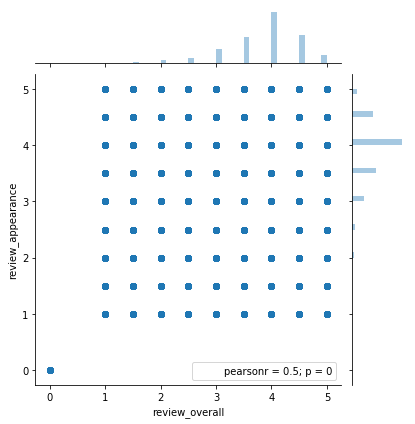

In [41]:
sns.jointplot(data=beer, x='review_overall', y='review_appearance')

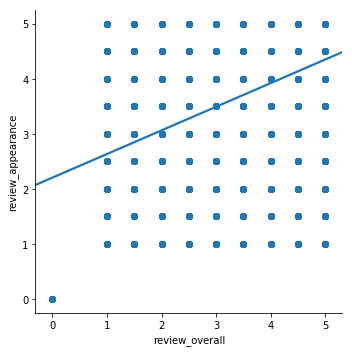

In [42]:
sns.lmplot(data=beer, x='review_overall', y='review_appearance')

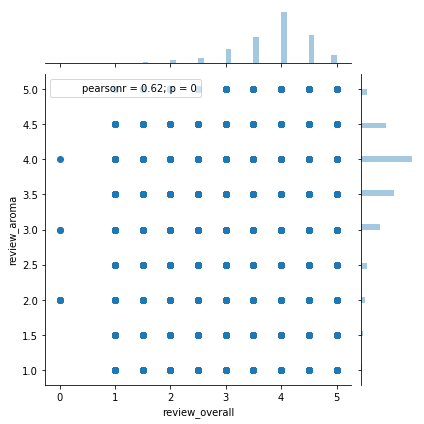

In [43]:
sns.jointplot(data=beer, x='review_overall', y='review_aroma')

TypeError: can't multiply sequence by non-int of type 'float'

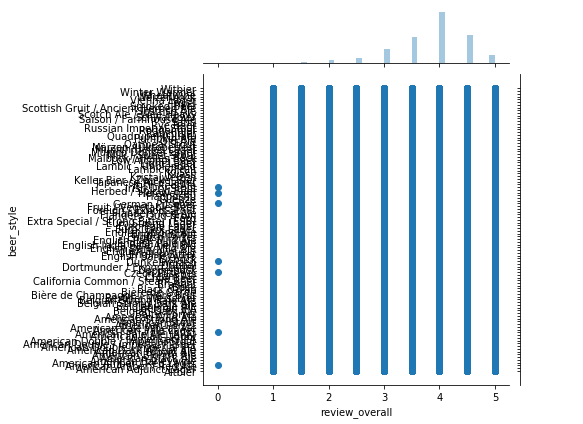

In [44]:
sns.jointplot(data=beer, x='review_overall', y='beer_style')

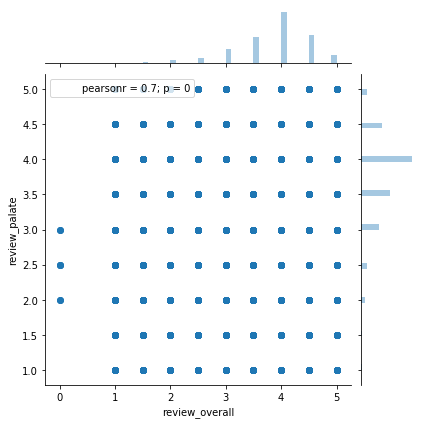

In [45]:
sns.jointplot(data=beer, x='review_overall', y='review_palate')

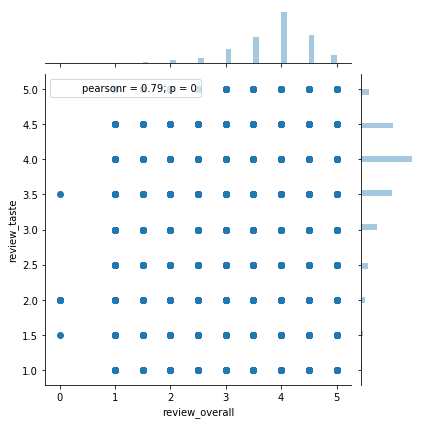

In [46]:
sns.jointplot(data=beer, x='review_overall', y='review_taste')

#### Conclusion

It is not possible to make any associations regarding the factor(s) in determining overall quality of a beer for the given data. The dataset has no information regarding the quality of the beer.

## If you generally enjoy beer due to its auroma and appreance, Which beer style should you try?

In [49]:
len(beer.beer_style.unique())

104

In [50]:
aa_beer = beer[['review_overall', 'review_aroma', 'review_appearance', 'beer_style',
       'review_palate', 'review_taste',]].groupby(['beer_style']).describe()

In [ ]:
aa_beer = beer[['review_overall', 'review_aroma', 'review_appearance', 'beer_style',
       'review_palate', 'review_taste',]].groupby(['beer_style']).describe()

In [62]:
aa_beer.head()

review_appearance                                \
                                       count      mean       std  min  25%   
beer_style                                                                   
Altbier                               7741.0  3.809327  0.514903  1.0  3.5   
American Adjunct Lager               30749.0  2.788546  0.737899  1.0  2.0   
American Amber / Red Ale             45751.0  3.810190  0.543047  0.0  3.5   
American Amber / Red Lager            9311.0  3.527494  0.603290  1.0  3.0   
American Barleywine                  26728.0  4.036535  0.478719  1.0  4.0   

                                          review_aroma           ...   \
                            50%  75%  max        count      mean ...    
beer_style                                                       ...    
Altbier                     4.0  4.0  5.0       7741.0  3.624015 ...    
American Adjunct Lager      3.0  3.0  5.0      30749.0  2.480211 ...    
American Amber / Red Ale    4.0  4.0  5.0      45751.0  3.627254 ...    
American Amber / Red Lager  3.5  4.0  5.0       9311.0  3.213296 ...    
American Barleywine         4.0  4.5  5.0      26728.0  4.019343 ...    

                           review_palate      review_taste            \
                                     75%  max        count      mean   
beer_style                                                             
Altbier                              4.0  5.0       7741.0  3.744865   
American Adjunct Lager               3.0  5.0      30749.0  2.683112   
American Amber / Red Ale             4.0  5.0      45751.0  3.696127   
American Amber / Red Lager           4.0  5.0       9311.0  3.373590   
American Barleywine                  4.5  5.0      26728.0  4.042633   

                                                               
                                 std  min  25%  50%  75%  max  
beer_style                                                     
Altbier                     0.628933  1.0  3.5  4.0  4.0  5.0  
American Adjunct Lager      0.821452  1.0  2.0  2.5  3.0  5.0  
American Amber / Red Ale    0.663731  1.0  3.5  4.0  4.0  5.0  
American Amber / Red Lager  0.701863  1.0  3.0  3.5  4.0  5.0  
American Barleywine         0.598375  1.0  4.0  4.0  4.5  5.0  

[5 rows x 40 columns]

In [78]:
all_beer = beer[['review_overall', 'beer_style']].groupby(['beer_style']).count()
all_beer = all_beer.rename(columns={'review_overall': 'total_count'}).reset_index()

aa_beer = beer[(beer.review_aroma==5.0) & (beer.review_appearance==5.0)]
#aa_beer = aa_beer
aa_beer = aa_beer[['review_aroma', 'beer_style']].groupby(['beer_style']).count()
aa_beer = aa_beer.rename(columns={'review_aroma': 'aa5_count'}).reset_index()
#.sort_values(ascending=False)

aa_beer = aa_beer.merge(all_beer)

aa_beer['%aa5'] = aa_beer.aa5_count/aa_beer.total_count
aa_beer.sort_values(by='%aa5', ascending=False).head(5)

,beer_style,aa5_count,total_count,%aa5
11,American Double / Imperial Stout,1705,50705,0.033626
83,Quadrupel (Quad),596,18086,0.032954
85,Russian Imperial Stout,1502,54129,0.027749
28,Bière de Champagne / Bière Brut,22,1046,0.021033
9,American Double / Imperial IPA,1636,85977,0.019028


### Result and Conclusion

If you generally enjoy beer due to its aroma and appreance, you should try the beer style American Double / Imperial Stout. It has the highest percent of 5.0 rating score for both aroma and appreance. 3.36% of American Double / Imperial Stout beers have 5.0 rating score for both aroma and appreance. The second best beer style is Quadrupel (Quad), which is rated 5.0 for both aroma and appreance by 3.29% reviewers.